In [19]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

1. Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [5]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

avocado_mean.rolling(3).mean().max().round(2)

1.85

2. Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50)

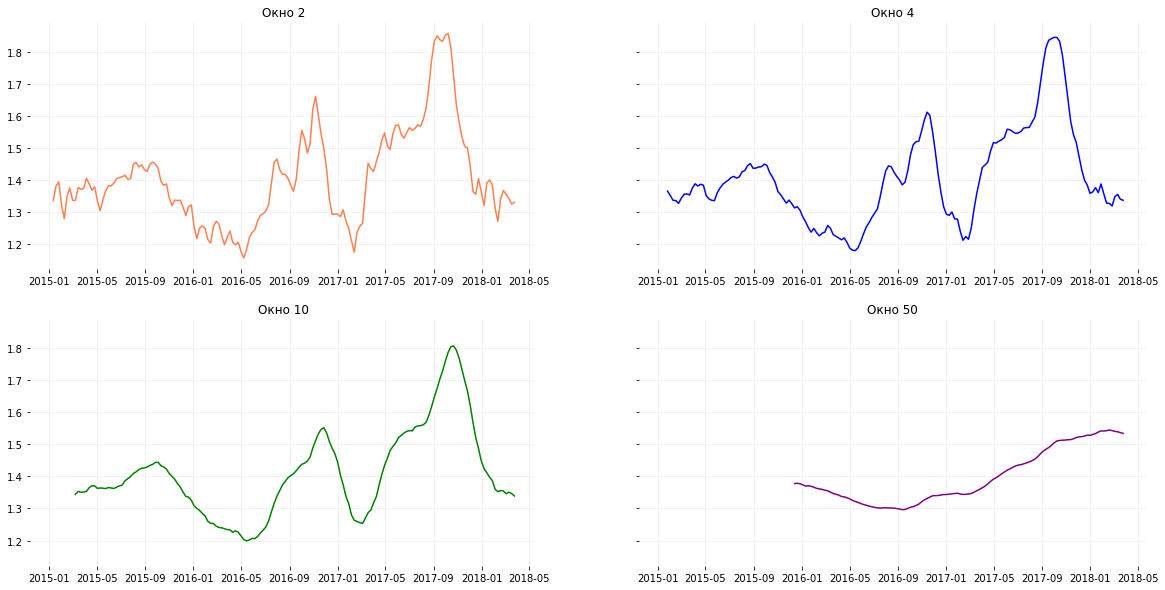

In [6]:
# строим несколько графиков на одном полотне
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True, sharex=True)

windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)   
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip(windows, axes.flatten()):
    ax.set(title='Окно {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')

3. Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, 
чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [7]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

4. И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 
и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. 
Числа округлите до трех знаков после точки.

 Ряд, полученный с помощью 
 ВЫБРАТЬ
  на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 
 ВЫБРАТЬ
 , что 
 ВЫБРАТЬ
  чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 
 ВЫБРАТЬ
  , и было 
 ВЫБРАТЬ
  чем при использовании rolling(), для которого значение было равно 
 ВЫБРАТЬ

In [8]:
avocado_full = pd.read_csv("avocado_full.csv",
                           index_col=0)

organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')

middle = organic_chicago.AveragePrice.rolling(window=4).mean().reset_index()

ex = organic_chicago.AveragePrice.ewm(span=4).mean().reset_index()


[Text(0, 0, '2015-01-04'),
 Text(0, 0, '2015-01-11'),
 Text(0, 0, '2015-01-18'),
 Text(0, 0, '2015-01-25'),
 Text(0, 0, '2015-02-01'),
 Text(0, 0, '2015-02-08'),
 Text(0, 0, '2015-02-15'),
 Text(0, 0, '2015-02-22'),
 Text(0, 0, '2015-03-01'),
 Text(0, 0, '2015-03-08'),
 Text(0, 0, '2015-03-15'),
 Text(0, 0, '2015-03-22'),
 Text(0, 0, '2015-03-29'),
 Text(0, 0, '2015-04-05'),
 Text(0, 0, '2015-04-12'),
 Text(0, 0, '2015-04-19'),
 Text(0, 0, '2015-04-26'),
 Text(0, 0, '2015-05-03'),
 Text(0, 0, '2015-05-10'),
 Text(0, 0, '2015-05-17'),
 Text(0, 0, '2015-05-24'),
 Text(0, 0, '2015-05-31'),
 Text(0, 0, '2015-06-07'),
 Text(0, 0, '2015-06-14'),
 Text(0, 0, '2015-06-21'),
 Text(0, 0, '2015-06-28'),
 Text(0, 0, '2015-07-05'),
 Text(0, 0, '2015-07-12'),
 Text(0, 0, '2015-07-19'),
 Text(0, 0, '2015-07-26'),
 Text(0, 0, '2015-08-02'),
 Text(0, 0, '2015-08-09'),
 Text(0, 0, '2015-08-16'),
 Text(0, 0, '2015-08-23'),
 Text(0, 0, '2015-08-30'),
 Text(0, 0, '2015-09-06'),
 Text(0, 0, '2015-09-13'),
 

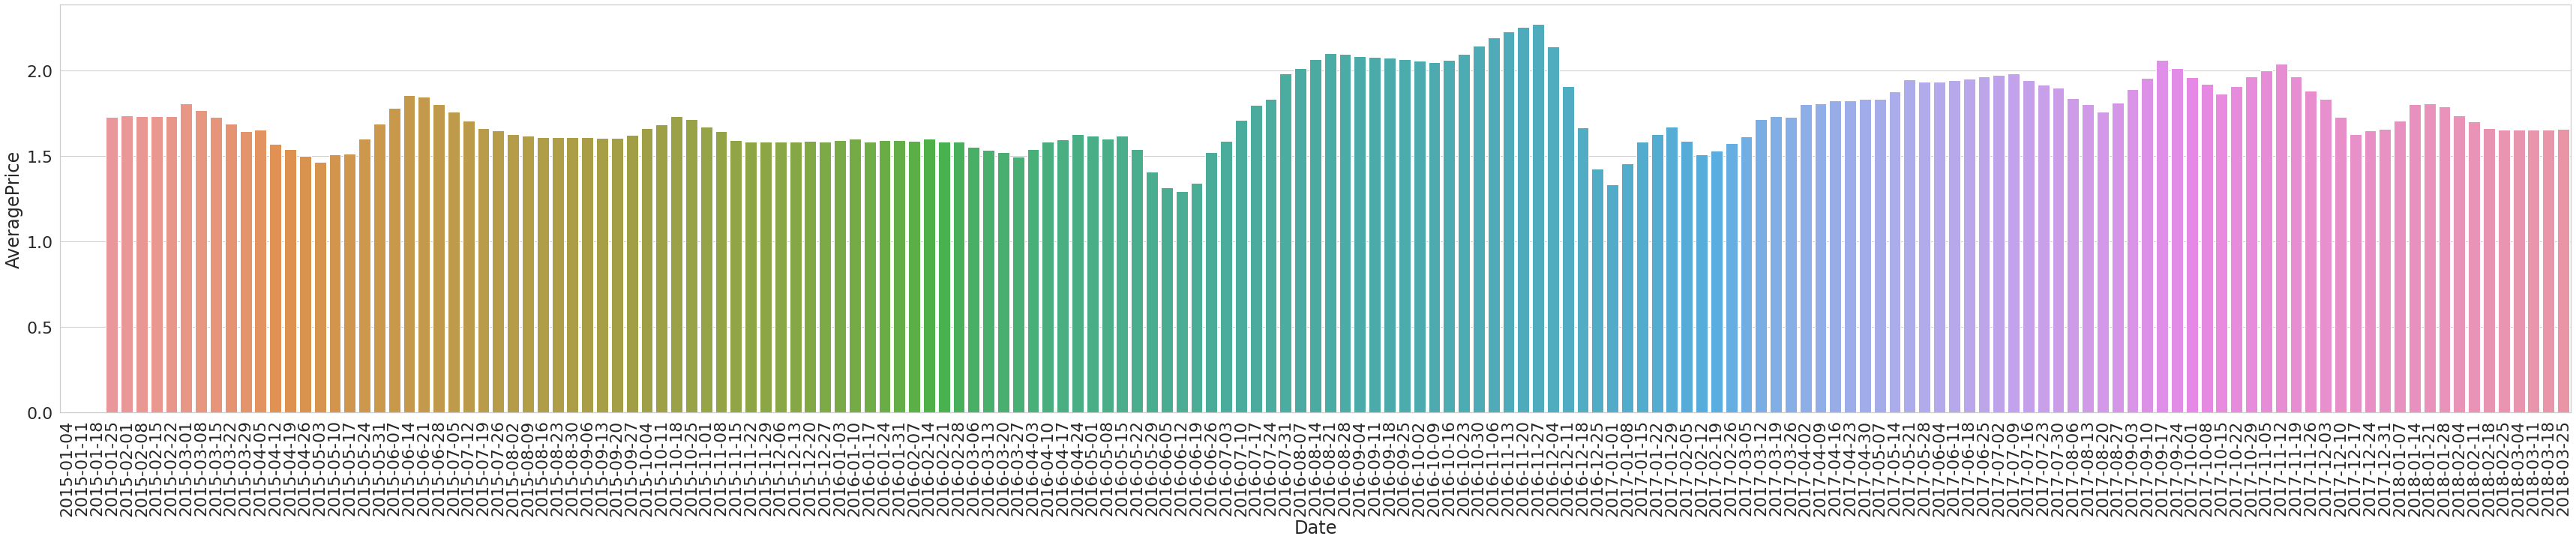

In [16]:
sns.set(font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(60, 10)})

# Set new labels
sns.barplot(data=middle, x='Date', y='AveragePrice').set_xticklabels(labels=middle.Date, rotation=90)

[Text(0, 0, '2015-01-04'),
 Text(0, 0, '2015-01-11'),
 Text(0, 0, '2015-01-18'),
 Text(0, 0, '2015-01-25'),
 Text(0, 0, '2015-02-01'),
 Text(0, 0, '2015-02-08'),
 Text(0, 0, '2015-02-15'),
 Text(0, 0, '2015-02-22'),
 Text(0, 0, '2015-03-01'),
 Text(0, 0, '2015-03-08'),
 Text(0, 0, '2015-03-15'),
 Text(0, 0, '2015-03-22'),
 Text(0, 0, '2015-03-29'),
 Text(0, 0, '2015-04-05'),
 Text(0, 0, '2015-04-12'),
 Text(0, 0, '2015-04-19'),
 Text(0, 0, '2015-04-26'),
 Text(0, 0, '2015-05-03'),
 Text(0, 0, '2015-05-10'),
 Text(0, 0, '2015-05-17'),
 Text(0, 0, '2015-05-24'),
 Text(0, 0, '2015-05-31'),
 Text(0, 0, '2015-06-07'),
 Text(0, 0, '2015-06-14'),
 Text(0, 0, '2015-06-21'),
 Text(0, 0, '2015-06-28'),
 Text(0, 0, '2015-07-05'),
 Text(0, 0, '2015-07-12'),
 Text(0, 0, '2015-07-19'),
 Text(0, 0, '2015-07-26'),
 Text(0, 0, '2015-08-02'),
 Text(0, 0, '2015-08-09'),
 Text(0, 0, '2015-08-16'),
 Text(0, 0, '2015-08-23'),
 Text(0, 0, '2015-08-30'),
 Text(0, 0, '2015-09-06'),
 Text(0, 0, '2015-09-13'),
 

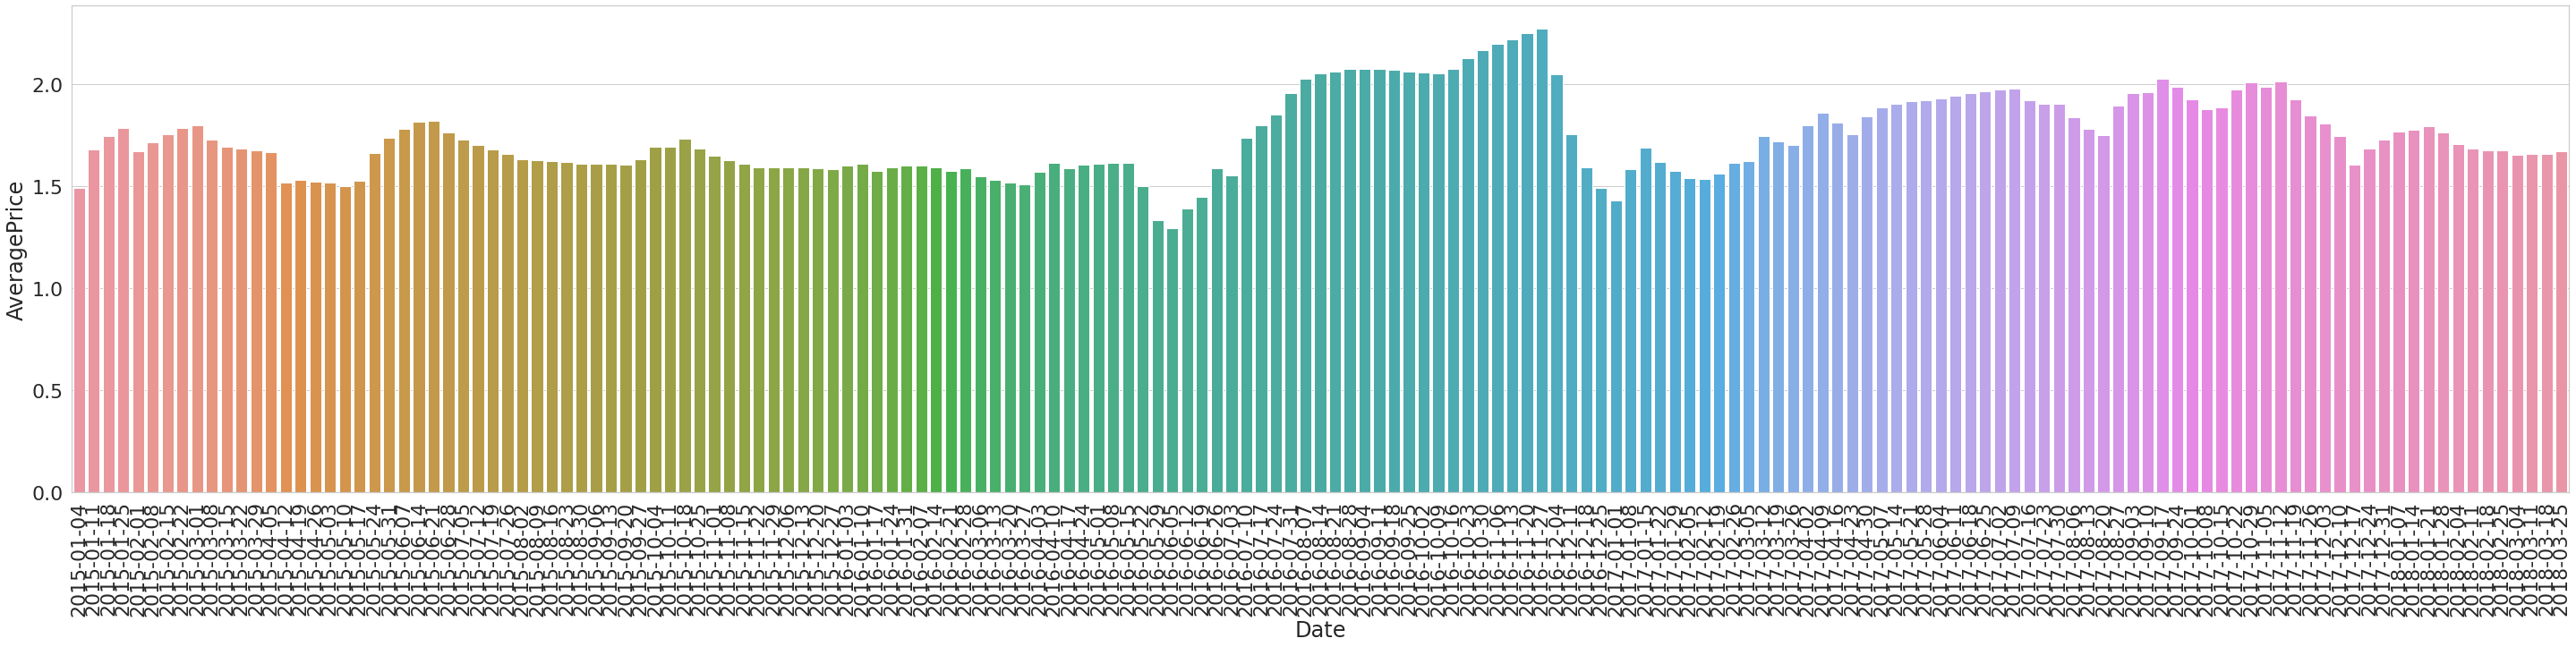

In [10]:
sns.barplot(data=ex, x='Date', y='AveragePrice').set_xticklabels(labels=ex.Date, rotation=90)

In [11]:
middle.query('Date == "2017-02-19"')

,Date,AveragePrice
111,2017-02-19,1.5325


5. Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, 
а самое важное – насколько они при этом опоздали. 
Прочитайте эти данные. Далее переведите delay в timedelta формат. Обратите внимание, 
что так просто столбец не переведётся – нужно будет убрать -.

NB! На LMS данные уже записаны в переменную df.

In [13]:
delay = pd.read_csv('delays.csv')
delay.delay = pd.to_timedelta(delay.delay.str.replace('-', ''))
delay

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


6. Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical

In [17]:
delay['delay_categorical'] = pd.cut(delay.delay, 3)
delay

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


7. Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

'less than 1 day' – время от 0 до 1 дня

'1-2 days' – от 1 до 2 дней

'2-3 days' – от 2 до 3 дней

'more than 3 days' – больше 3 дней

In [18]:
delay['delay_categorical'] = pd.cut(delay.delay, pd.to_timedelta(['0d', '1d', '2d', '3d', '100d']), labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])
delay

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


8. Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. 

In [22]:
px.bar(x=delay.delay_categorical)